In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import Generator, PCG64
from sklearn.cluster import *
from scipy import stats
from sklearn.metrics import *

In [2]:
gen = Generator(PCG64(1))

# Generation of test data

In [3]:
def generate_centroid(centroid, scatter, n_points):
    return gen.normal(centroid, scatter, (n_points, 2))

In [4]:
n_points = 100

cluster_1 = generate_centroid([5, 5], 1.2, n_points)
cluster_2 = generate_centroid([0, 0], 1.1, n_points)
cluster_3 = generate_centroid([10, 0], 1.6, n_points)

D = np.concatenate((cluster_1, cluster_2, cluster_3))
df = pd.DataFrame(data=D, columns=["x", "y"])
df["real_cluster"] = n_points * ["c1"] + n_points * ["c2"] + n_points * ["c3"]

<AxesSubplot:xlabel='x', ylabel='y'>

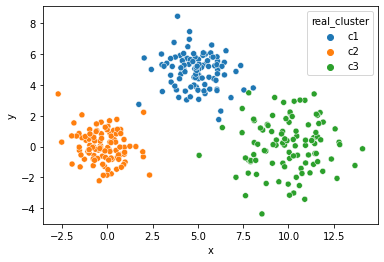

In [5]:
sns.scatterplot(data=df, x="x", y="y", hue="real_cluster")

# K - means

In [6]:
kmeans = KMeans(n_clusters = 3, max_iter=600, random_state=1)
predicted_clusters = kmeans.fit_predict(D)
centroids = kmeans.cluster_centers_

In [7]:
df["predicted_cluster"] = predicted_clusters

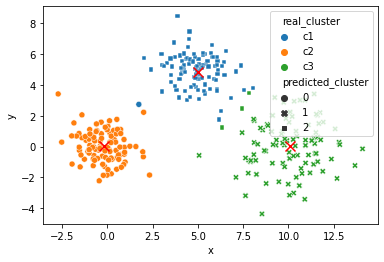

In [8]:
sns.scatterplot(data=df, x="x", y="y", hue="real_cluster", style="predicted_cluster")
plt.scatter(x=centroids[:,0], y=centroids[:, 1], color="red", marker="x", s=100)

In [9]:
df["predicted_cluster"] = df.groupby("predicted_cluster")["real_cluster"].transform(lambda x:x.mode().to_list() * len(x))

In [10]:
outliers = df.loc[df.real_cluster != df.predicted_cluster]

In [11]:
outliers

,x,y,real_cluster,predicted_cluster
12,1.746605,2.733184,c1,c2
205,6.351586,1.226909,c3,c1
250,7.807456,3.480957,c3,c1
261,7.448697,2.463866,c3,c1


# Métricas

In [12]:
silhouette_score(D, predicted_clusters)

0.677243804989032

In [13]:
homogeneity_score(df.real_cluster, df.predicted_cluster)

0.9419125420760447

In [14]:
calinski_harabasz_score(D, df.predicted_cluster) # Maior, melhor

1058.1680984297702

In [15]:
davies_bouldin_score(D, df.predicted_cluster) # Mais próximo de 0 melhor

0.44656163824539274